In [2]:
import os 
import numpy as np



base = '/home/nathan/LLM4TS/datasets/anomaly_detection/SMD'

files = os.listdir(base)

test_files = os.path.join(base, 'SMD_test.npy')

data = np.load(test_files)



In [ ]:
q6_usernam = "Bob"

q6_usernam = q6_usernam.lower()

if q6_usernam.startswith(","):
    output6 =  "Invalid user entry!"
    print(output6)

elif q6_usernam == "system admin":
    output6 = "Welcome to the system admin dashboard!"
    print(output6)

else:
    output6 =  "Good morning user! Welcome to the dashboard."
    print(output6)

In [ ]:
from data_provider.data_loader import Dataset_ETT_hour,Dataset_ETT_hour_decomposed, Dataset_ETT_minute,Dataset_ETT_minute_decomposed,Dataset_Custom
from data_provider.data_loader import Dataset_ETT_hour, Dataset_ETT_minute, Dataset_Custom, PSMSegLoader, \
    MSLSegLoader, SMAPSegLoader, SMDSegLoader, SWATSegLoader, UEAloader

from torch.utils.data import DataLoader
from data_provider.uea import *




data_dict = {
    'ETTh1': Dataset_ETT_hour,
    'ETTh1_decomposed': Dataset_ETT_hour_decomposed,
    'ETTh2': Dataset_ETT_hour,
    'ETTh2_decomposed': Dataset_ETT_hour_decomposed,
    'ETTm1': Dataset_ETT_minute,
    'ETTm1_decomposed': Dataset_ETT_minute_decomposed,
    'ETTm2': Dataset_ETT_minute,
    'custom': Dataset_Custom,
    'ETTm2_decomposed': Dataset_ETT_minute_decomposed,
    'ECL': Dataset_Custom,
    'traffic': Dataset_Custom,
    'weather': Dataset_Custom,
    'PSM': PSMSegLoader,
    'MSL': MSLSegLoader,
    'SMAP': SMAPSegLoader,
    'SMD': SMDSegLoader,
    'SWAT': SWATSegLoader,
    'UEA': UEAloader
}



def data_provider(flag):
    data = 'SMD'
    root_path = '/home/nathan/LLM4TS/datasets/anomaly_detection/SMD'
    seq_len = 100
    
    
    Data = data_dict[data]
    data_set = Data(
        root_path=root_path,
        win_size=seq_len,
        flag=flag,
    )
    
    
    data_loader = DataLoader(
        data_set,
        batch_size=16,
        shuffle=True,
        num_workers=8,
        drop_last=False)
    return data_set, data_loader
    


In [ ]:
import numpy as np


list_data = [34.22, 67.19, 29.76, 75.12, 98.10, 80.92, 91.20, 56.11, 99.04, 86.56]


list_data = [26.99, 62.71, 31.29, 72.20, 94.86, 81.45, 85.32, 52.77, 97.95, 85.94]
np.mean(list_data)



In [ ]:
import torch


torch.cuda.is_available()

In [6]:
data_set, data_loader = data_provider('test')

In [ ]:
for data, _ in data_set:
    print(data.shape)
    break

In [ ]:
# Required libraries for decomposition and plotting
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Generating example time series data (100 time steps)
# Replace this with actual data as needed
time_series_data = data[:, 1]

# Convert the data to a pandas Series for easier manipulation
df = pd.Series(time_series_data)

# Decompose the time series into trend, seasonal, and residual components
result = seasonal_decompose(df, period=5, model='additive', extrapolate_trend='freq')

# Plotting the decomposition results
plt.figure(figsize=(10, 8))

plt.subplot(411)
plt.plot(result.observed, label='Observed')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(result.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(result.seasonal, label='Seasonal')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(result.resid, label='Residual')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


In [ ]:
# Creating a similar decomposition function to match the provided implementation
def decompose(x, trend_length, seasonal_length):
    df = pd.DataFrame(x)
    
    # Calculate trend using rolling mean
    trend = df.rolling(window=trend_length, center=True).mean().fillna(method='bfill').fillna(method='ffill')
    
    # Detrend the data by subtracting the trend
    detrended = df - trend
    
    # Calculate seasonal component by grouping and taking the mean
    seasonal = detrended.groupby(detrended.index % seasonal_length).transform('mean').fillna(method='bfill').fillna(method='ffill')
    
    # Calculate residuals (what's left after removing trend and seasonal components)
    residuals = df - trend - seasonal
    
    # Combine trend, seasonal, and residual components
    combined = np.stack([trend, seasonal, residuals], axis=1)
    
    return combined

# Using the same random time series data (100 time steps) for consistency
trend_length = 4  # Trend length, similar to the period used earlier
seasonal_length = 5  # Seasonal length

# Decompose the time series data using the custom function
combined_components = decompose(data[:, 1], trend_length, seasonal_length)

# Plotting the decomposed components (trend, seasonal, residuals)
plt.figure(figsize=(10, 8))

# Plot trend
plt.subplot(411)
plt.plot(combined_components[:, 0], label='Trend')
plt.legend(loc='upper left')

# Plot seasonal
plt.subplot(412)
plt.plot(combined_components[:, 1], label='Seasonal')
plt.legend(loc='upper left')

# Plot residuals
plt.subplot(413)
plt.plot(combined_components[:, 2], label='Residual')
plt.legend(loc='upper left')

# Plot original observed data for reference
plt.subplot(414)
plt.plot(time_series_data, label='Observed')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import time

# Custom function adapted for testing
def custom_decompose(x, trend_length, seasonal_length):
    df = pd.DataFrame(x)
    trend = df.rolling(window=trend_length, center=True).mean().fillna(method='bfill').fillna(method='ffill')
    detrended = df - trend
    seasonal = detrended.groupby(detrended.index % seasonal_length).transform('mean').fillna(method='bfill').fillna(method='ffill') 
    residuals = df - trend - seasonal
    return trend, seasonal, residuals

# Generate a sample time series with a trend and seasonality
np.random.seed(0)
dates = pd.date_range('20230101', periods=100)
data = pd.Series(np.random.randn(100).cumsum() + 10 * np.sin(np.linspace(0, 20, 100)), index=dates)

# Configurations for decomposition
trend_length = 10
seasonal_length = 10

# Testing the custom function
start_time = time.time()
custom_trend, custom_seasonal, custom_residual = custom_decompose(data, trend_length, seasonal_length)
custom_time = time.time() - start_time

# Testing the seasonal_decompose from statsmodels
start_time = time.time()
result = seasonal_decompose(data, model='additive', period=seasonal_length)
statsmodels_time = time.time() - start_time

# Print results
print(f"Custom Function Time: {custom_time:.5f} seconds")
print(f"Statsmodels Time: {statsmodels_time:.5f} seconds")


In [ ]:
import numpy as np

data = [0.3006, 0.3706, 0.3659, 0.4283]
np.mean(data)

In [2]:
import numpy as np 

data =  [[0.3542 , 0.2552 , 0.3664 , 0.2571 , 0.3668 , 0.2574 , 0.4166 , 0.2994 , 0.3803 , 0.2734 , 0.3837 , 0.2748],
         [0.3989 , 0.2812 , 0.3948 , 0.2801 , 0.4903 , 0.3649 , 0.4666 , 0.3362 , 0.6475 , 0.4585 , 0.5363 , 0.3932],
         [0.4044 , 0.2838 , 0.4164 , 0.2877 , 0.5674 , 0.4033 , 0.4895 , 0.3445 , 0.5424 , 0.3752 , 0.6083 , 0.4205],
        [0.4451 , 0.3016 , 0.4338 , 0.2958 , 0.5353 , 0.3819 , 0.4684 , 0.3267 , 0.4385 , 0.2971 , 0.4347 , 0.2961]]
print(np.mean(data, axis=0))


[0.40065  0.28045  0.40285  0.280175 0.48995  0.351875 0.460275 0.3267
 0.502175 0.35105  0.49075  0.34615 ]


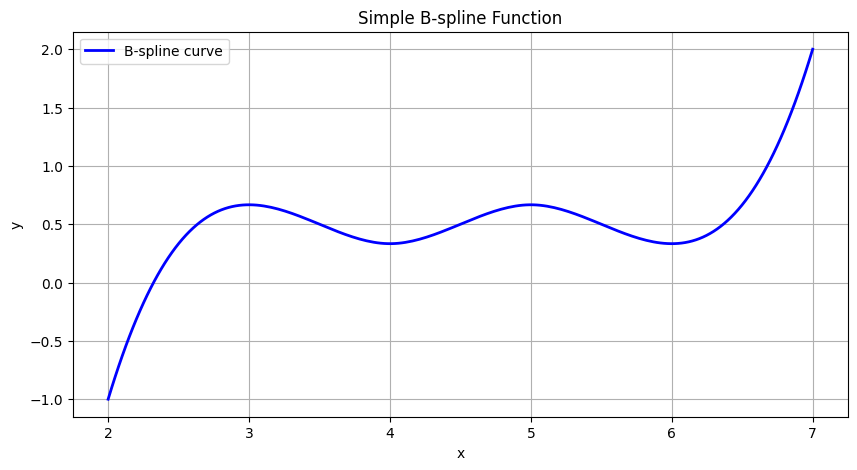

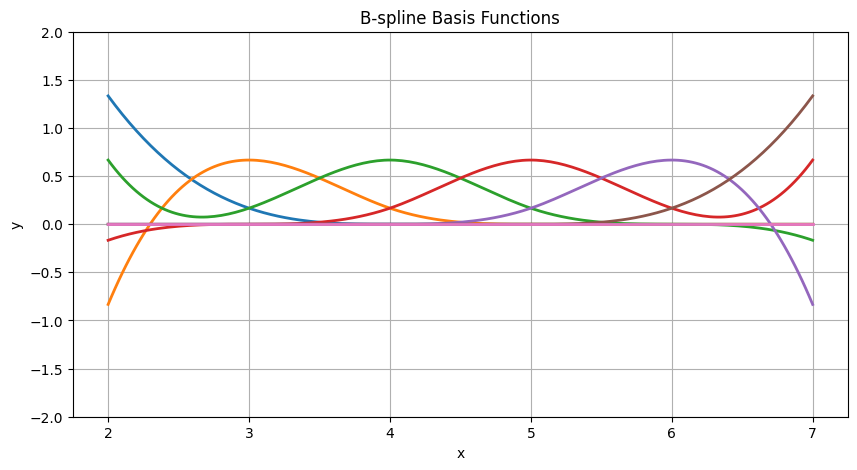

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import BSpline

# Define the order of the spline (degree + 1)
k = 3  # cubic spline (degree 3)

# Knot vector (non-decreasing sequence)
knots = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

# Control points (simpler example)
control_points = np.array([0, 1, 0, 1, 0, 1, 0])

# Define the B-spline curve
spline = BSpline(knots, control_points, k)

# Generate x-values (parameter) and compute corresponding y-values (spline values)
x_vals = np.linspace(2, 7, 200)  # In the range of the knots
y_vals = spline(x_vals)


# Plot the B-spline function
plt.figure(figsize=(10, 5))
plt.plot(x_vals, y_vals, label='B-spline curve', color='blue', lw=2)
plt.title("Simple B-spline Function")
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()

# Plot the basis functions
plt.figure(figsize=(10, 5))
for i in range(len(control_points)):
    coeffs = np.zeros(len(control_points))
    coeffs[i] = 1.0
    basis_spline = BSpline(knots, coeffs, k)
    y_basis_vals = basis_spline(x_vals)
    plt.plot(x_vals, y_basis_vals, label=f'Basis {i}', lw=2)

plt.title("B-spline Basis Functions")
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.ylim(-2, 2)
# plt.legend()

# Show plots
plt.show()


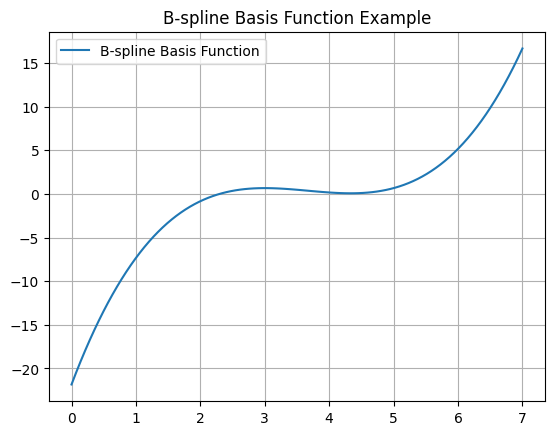

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import BSpline

# Knot vector (with repeating knots at the boundaries)
knots = [0, 1, 2, 3, 4, 5, 6, 7]

# Coefficients for the B-spline basis functions
coeffs = [0, 1, 0, 0, 0]  # Example coefficients, you can modify these

# Degree of the B-spline (k=2 is quadratic, k=3 is cubic, etc.)
degree = 3

# Create the B-spline object
b_spline = BSpline(knots, coeffs, degree)

# Generate a fine grid to evaluate the B-spline basis function
x_fine = np.linspace(0, 7, 100)
y_fine = b_spline(x_fine)

# Plot the B-spline basis function
plt.plot(x_fine, y_fine, label="B-spline Basis Function")
plt.title("B-spline Basis Function Example")
plt.legend()
plt.grid(True)
plt.show()


In [2]:
import numpy as np

data =  [[0.0121 , 0.0504 , 0.0207 , 0.0862 , 0.0102 , 0.0559 , 0.0510 , 0.0951 , 0.0468 , 0.0884 , 0.1253 , 0.1784],
        [0.0142 , 0.0536 , 0.0177 , 0.0810 , 0.0103 , 0.0621 , 0.0415 , 0.0867 , 0.0410 , 0.0802 , 0.1066 , 0.1659],
        [0.0142 , 0.0540 , 0.0172 , 0.0794 , 0.0102 , 0.0592 , 0.0546 , 0.1171 , 0.0346 , 0.0711 , 0.1056 , 0.1654],
        [0.0104 , 0.0477 , 0.0175 , 0.0770 , 0.0105 , 0.0554 , 0.0610 , 0.1235 , 0.0377 , 0.0815 , 0.1086 , 0.1678]]

np.mean(data, axis=0)

array([0.012725, 0.051425, 0.018275, 0.0809  , 0.0103  , 0.05815 ,
       0.052025, 0.1056  , 0.040025, 0.0803  , 0.111525, 0.169375])

In [1]:
import numpy as np 
import torch
from einops import rearrange


gpt_data = np.load('/home/nathan/LLM4TS/Anomaly_Detection_task/S2IP/GPT2_illness___104_60_100_time_token.npy')
gpt_data = torch.tensor(gpt_data)
gpt_data = gpt_data.contiguous().permute(0,2,1,3)
gpt_data = rearrange(gpt_data, 'b s i e -> (b s) i e')
gpt_data = gpt_data.detach().cpu().numpy()



Random_data = np.load('/home/nathan/LLM4TS/Anomaly_Detection_task/S2IP/Random_illness___104_60_100_time_token.npy')
Random_data = torch.tensor(Random_data)
Random_data = Random_data.contiguous().permute(0,2,1,3)
Random_data = rearrange(Random_data, 'b s i e -> (b s) i e')
Random_data = Random_data.detach().cpu().numpy()


txt_token_last = np.load('/home/nathan/LLM4TS/Imputation_task/CALF/txt_tokens_last.npy')
txt_token_first = np.load('/home/nathan/LLM4TS/Imputation_task/CALF/txt_tokens_first.npy')

/opt/conda/Anaconda3/envs/IRTS/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


/opt/conda/Anaconda3/envs/IRTS/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


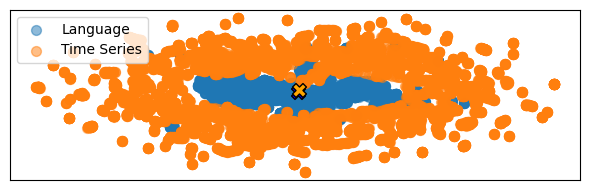

In [7]:
import numpy as np
import umap
import matplotlib.pyplot as plt

n_samples = 10000
# Example: Assuming txt_tokens and last_layer are of shape (batch_size, feature_size)
# Combine a batch of data (ensure both have the same number of samples)
combined_data = np.vstack((Random_data[:n_samples, :], txt_token_last[:n_samples, :]))

# Create labels for each batch (0 for txt_tokens, 1 for last_layer)
labels = np.array([0] * n_samples + [1] * n_samples)  # Adjust based on the number of samples

# Initialize and apply UMAP
reducer = umap.UMAP(n_components=2, random_state=42, n_neighbors=5)
reduced_data = reducer.fit_transform(combined_data)

# Calculate centroids for each cluster
centroid_language = reduced_data[labels == 1].mean(axis=0)
centroid_time_series = reduced_data[labels == 0].mean(axis=0)

# Visualize the reduced data and centroids
plt.figure(figsize=(6, 2))
plt.scatter(reduced_data[labels == 1, 0], reduced_data[labels == 1, 1], s=50, label='Language', alpha=0.5)
plt.scatter(reduced_data[labels == 0, 0], reduced_data[labels == 0, 1], s=50, label='Time Series', alpha=0.5)

# Plot centroids
plt.scatter(centroid_language[0], centroid_language[1], s=100, c='blue', edgecolors='k', marker='X')
plt.scatter(centroid_time_series[0], centroid_time_series[1], s=100, c='orange', edgecolors='k', marker='X')

# Customize plot
plt.legend(loc='upper left', bbox_to_anchor=(0, 1), fontsize=10)
plt.yticks([])
plt.xticks([])
plt.tight_layout()
plt.show()


/opt/conda/Anaconda3/envs/IRTS/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


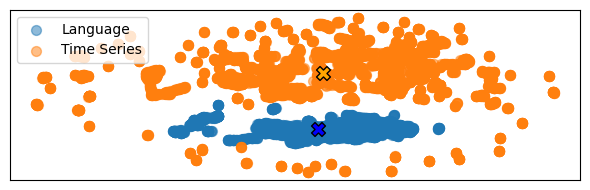

In [2]:
import numpy as np
import umap
import matplotlib.pyplot as plt
import torch
from einops import rearrange
# Random_data = np.load('/home/nathan/LLM4TS/Anomaly_Detection_task/S2IP/Random_illness___104_60_100_time_token.npy')
Random_data = np.load('/home/nathan/LLM4TS/Anomaly_Detection_task/S2IP/GPT2_ETTh1_512_720_time_token.npy')
Random_data = torch.tensor(Random_data)
Random_data = Random_data.contiguous().permute(0,2,1,3)
Random_data = rearrange(Random_data, 'b s i e -> (b s) i e')
Random_data = Random_data.detach().cpu().numpy()
Random_data = Random_data[:, -1, :]

txt_token_last = np.load('/home/nathan/LLM4TS/Imputation_task/CALF/txt_tokens_last.npy')


n_samples = 10000
# Example: Assuming txt_tokens and last_layer are of shape (batch_size, feature_size)
# Combine a batch of data (ensure both have the same number of samples)
combined_data = np.vstack((Random_data[:n_samples, :], txt_token_last[:n_samples, :]))

# Create labels for each batch (0 for txt_tokens, 1 for last_layer)
labels = np.array([0] * n_samples + [1] * n_samples)  # Adjust based on the number of samples

# Initialize and apply UMAP
reducer = umap.UMAP(n_components=2, random_state=42, n_neighbors=5)
reduced_data = reducer.fit_transform(combined_data)

# Calculate centroids for each cluster
centroid_language = reduced_data[labels == 1].mean(axis=0)
centroid_time_series = reduced_data[labels == 0].mean(axis=0)

# Visualize the reduced data and centroids
plt.figure(figsize=(6, 2))
plt.scatter(reduced_data[labels == 1, 0], reduced_data[labels == 1, 1], s=50, label='Language', alpha=0.5)
plt.scatter(reduced_data[labels == 0, 0], reduced_data[labels == 0, 1], s=50, label='Time Series', alpha=0.5)

# Plot centroids
plt.scatter(centroid_language[0], centroid_language[1], s=100, c='blue', edgecolors='k', marker='X')
plt.scatter(centroid_time_series[0], centroid_time_series[1], s=100, c='orange', edgecolors='k', marker='X')

# Customize plot
plt.legend(loc='upper left', bbox_to_anchor=(0, 1), fontsize=10)
plt.yticks([])
plt.xticks([])
plt.tight_layout()
plt.show()


/opt/conda/Anaconda3/envs/IRTS/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/opt/conda/Anaconda3/envs/IRTS/lib/python3.10/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(


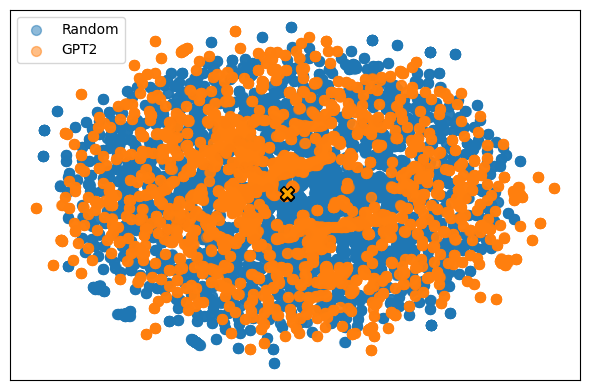

In [3]:
import numpy as np
import umap
import matplotlib.pyplot as plt
import torch
from einops import rearrange


# Random_data = np.load('/home/nathan/LLM4TS/Anomaly_Detection_task/S2IP/Random_illness___104_60_100_time_token.npy')
Random_data = np.load('GPT2_ETTh1_512_720_time_token.npy')
Random_data = torch.tensor(Random_data)
Random_data = Random_data.contiguous().permute(0,2,1,3)
Random_data = rearrange(Random_data, 'b s i e -> (b s) i e')
Random_data = Random_data.detach().cpu().numpy()
Random_data = Random_data[:, -1, :]

txt_token_last = np.load('Random_ETTh1_512_720_time_token.npy')
txt_token_last = torch.tensor(txt_token_last)
txt_token_last = txt_token_last.contiguous().permute(0,2,1,3)
txt_token_last = rearrange(txt_token_last, 'b s i e -> (b s) i e')
txt_token_last = txt_token_last.detach().cpu().numpy()
txt_token_last = txt_token_last[:, -1, :]

n_samples = 10000
# Example: Assuming txt_tokens and last_layer are of shape (batch_size, feature_size)
# Combine a batch of data (ensure both have the same number of samples)
combined_data = np.vstack((Random_data[:n_samples, :], txt_token_last[:n_samples, :]))

# Create labels for each batch (0 for txt_tokens, 1 for last_layer)
labels = np.array([0] * n_samples + [1] * n_samples)  # Adjust based on the number of samples

# Initialize and apply UMAP
reducer = umap.UMAP(n_components=2, random_state=42, n_neighbors=5)
reduced_data = reducer.fit_transform(combined_data)

# Calculate centroids for each cluster
centroid_language = reduced_data[labels == 1].mean(axis=0)
centroid_time_series = reduced_data[labels == 0].mean(axis=0)

# Visualize the reduced data and centroids
plt.figure(figsize=(6, 4))
plt.scatter(reduced_data[labels == 1, 0], reduced_data[labels == 1, 1], s=50, label='Random', alpha=0.5)
plt.scatter(reduced_data[labels == 0, 0], reduced_data[labels == 0, 1], s=50, label='GPT2', alpha=0.5)

# Plot centroids
plt.scatter(centroid_language[0], centroid_language[1], s=100, c='blue', edgecolors='k', marker='X')
plt.scatter(centroid_time_series[0], centroid_time_series[1], s=100, c='orange', edgecolors='k', marker='X')

# Customize plot
plt.legend(loc='upper left', bbox_to_anchor=(0, 1), fontsize=10)
plt.yticks([])
plt.xticks([])
plt.tight_layout()
plt.show()


/opt/conda/Anaconda3/envs/IRTS/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


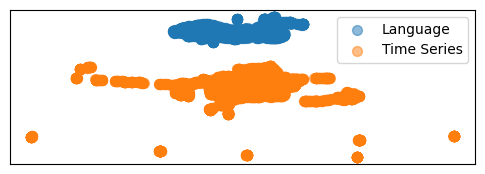

In [13]:
import numpy as np
import umap
import matplotlib.pyplot as plt
import torch
from einops import rearrange
# gpt_data = np.load('/home/nathan/LLM4TS/Anomaly_Detection_task/S2IP/GPT2_illness___104_60_100_time_token.npy')
gpt_data = np.load('/home/nathan/LLM4TS/Anomaly_Detection_task/S2IP/GPT2_ETTh1_512_720_time_token.npy')
gpt_data = torch.tensor(gpt_data)
gpt_data = gpt_data.contiguous().permute(0,2,1,3)
gpt_data = rearrange(gpt_data, 'b s i e -> (b s) i e')
gpt_data = gpt_data.detach().cpu().numpy()
txt_token_last = np.load('/home/nathan/LLM4TS/Imputation_task/CALF/txt_tokens_last.npy')


gpt_last = gpt_data[:, -1, :]


n_ts = 10000
n_txt = 10000
combined_data = np.vstack((txt_token_last[:n_txt, :], gpt_last[:n_ts, :]))

# Create labels for each batch (0 for txt_tokens, 1 for last_layer)
labels = np.array([0] * n_txt + [1] * n_ts)  # Adjust based on the number of samples

# Initialize and apply UMAP
reducer = umap.UMAP(n_components=2, random_state=2, n_neighbors=20)
reduced_data = reducer.fit_transform(combined_data)

# Visualize the reduced data
plt.figure(figsize=(6, 2))
plt.scatter(reduced_data[labels == 0, 0], reduced_data[labels == 0, 1], s=50, label='Language', alpha=0.5)
plt.scatter(reduced_data[labels == 1, 0], reduced_data[labels == 1, 1], s=50, label='Time Series', alpha=0.5)
# plt.title("UMAP Visualization of Two Batches of High-Dimensional Data")
# plt.xlabel("UMAP Feature 1")
# plt.ylabel("UMAP Feature 2")
plt.xticks([])
plt.yticks([])
plt.legend()
plt.show()


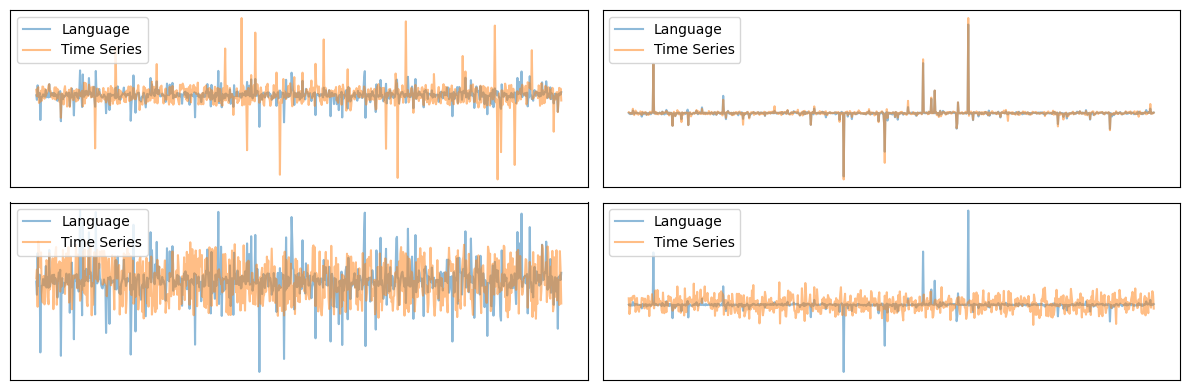

In [4]:
import numpy as np
import umap
import matplotlib.pyplot as plt
import torch
from einops import rearrange
gpt_data = np.load('/home/nathan/LLM4TS/Anomaly_Detection_task/S2IP/GPT2_illness___104_60_100_time_token.npy')
# gpt_data = np.load('/home/nathan/LLM4TS/Anomaly_Detection_task/S2IP/GPT2_ETTh1_512_720_time_token.npy')
gpt_data = torch.tensor(gpt_data)
gpt_data = gpt_data.contiguous().permute(0,2,1,3)
gpt_data = rearrange(gpt_data, 'b s i e -> (b s) i e')
gpt_data = gpt_data.detach().cpu().numpy()


Random_data = np.load('/home/nathan/LLM4TS/Anomaly_Detection_task/S2IP/Random_illness___104_60_100_time_token.npy')
# Random_data = np.load('/home/nathan/LLM4TS/Anomaly_Detection_task/S2IP/Random_ETTh1_512_720_time_token.npy')
Random_data = torch.tensor(Random_data)
Random_data = Random_data.contiguous().permute(0,2,1,3)
Random_data = rearrange(Random_data, 'b s i e -> (b s) i e')
Random_data = Random_data.detach().cpu().numpy()



txt_token_first = np.load('/home/nathan/LLM4TS/Imputation_task/CALF/txt_tokens_first.npy')
txt_token_last = np.load('/home/nathan/LLM4TS/Imputation_task/CALF/txt_tokens_last.npy')


gpt_last = gpt_data[:, -1, :]
gpt_first = gpt_data[:, 0, :]



random_first = Random_data[:, 0, :]
random_last = Random_data[:, -1, :]


gpt_first_mean = np.reshape(gpt_first, (-1, 768)).mean(axis=0)
gpt_last_mean = np.reshape(gpt_last, (-1, 768)).mean(axis=0)

random_first_mean = np.reshape(random_first, (-1, 768)).mean(axis=0)
random_last_mean = np.reshape(random_last, (-1, 768)).mean(axis=0)

txt_token_first_mean = txt_token_first.mean(axis=0)
txt_token_last_mean = txt_token_last.mean(axis=0)


fig, ax = plt.subplots(2, 2, figsize=(12, 4))
ax[0, 0].plot(txt_token_first_mean, label='Language', alpha=0.5)
ax[0, 0].plot(gpt_first_mean, label='Time Series', alpha=0.5)

ax[0, 0].legend()
ax[0, 0].set_xticks([])
ax[0, 0].set_yticks([])
ax[0, 0].legend(loc='upper left', bbox_to_anchor=(0, 1)) 
# ax[0, 0].set_title('Feature map before LLM')


ax[1, 0].plot(txt_token_first_mean, label='Language', alpha=0.5)
ax[1, 0].plot(random_first_mean, label='Time Series', alpha=0.5)

ax[1, 0].legend()
ax[1, 0].set_xticks([])
ax[1, 0].set_yticks([])
ax[1, 0].legend(loc='upper left', bbox_to_anchor=(0, 1)) 
# ax[1, 0].set_title('Feature map after LLM')


ax[0, 1].plot(txt_token_last_mean, label='Language', alpha=0.5)
ax[0, 1].plot(gpt_last_mean, label='Time Series', alpha=0.5)

ax[0, 1].legend()
ax[0, 1].set_xticks([])
ax[0, 1].set_yticks([])
ax[0, 1].legend(loc='upper left', bbox_to_anchor=(0, 1))
# ax[0, 1].set_ylim(-1, 1)
# ax[0, 0].set_title('Feature map before LLM')


ax[1, 1].plot(txt_token_last_mean, label='Language', alpha=0.5)
ax[1, 1].plot(random_last_mean, label='Time Series', alpha=0.5)
ax[1, 1].legend()
ax[1, 1].set_xticks([])
ax[1, 1].set_yticks([])
ax[1, 1].legend(loc='upper left', bbox_to_anchor=(0, 1)) 
plt.tight_layout()

In [2]:
import numpy as np 

data =  [[2.622 , 1.113 , 2.328 , 1.034 , 2.179 , 0.923 , 2.192 , 1.004 , 2.284 , 1.024 , 2.172 , 0.975],
        [2.515 , 1.098 , 2.271 , 1.021 , 2.192 , 1.001 , 1.830 , 0.866 , 2.200 , 1.001 , 2.136 , 0.977],
        [2.530 , 1.066 , 2.261 , 0.962 , 2.255 , 1.003 , 1.786 , 0.859 , 1.967 , 0.936 , 2.037 , 0.952],
        [2.329 , 1.065 , 2.191 , 1.008 , 2.311 , 1.028 , 2.251 , 0.979 , 2.148 , 1.009 , 1.996 , 0.967],
        [1.941 , 0.918 , 2.263 , 1.006 , 2.234 , 0.989 , 2.015 , 0.927 , 2.150 , 0.992 , 1.941 , 0.918]]
                
                
np.mean(data, axis=0)

array([2.3874, 1.052 , 2.2628, 1.0062, 2.2342, 0.9888, 2.0148, 0.927 ,
       2.1498, 0.9924, 2.0564, 0.9578])

DW Statistics------> 0.2896299362182617
DW Statistics------> 0.26886656880378723
DW Statistics------> 0.23004402220249176


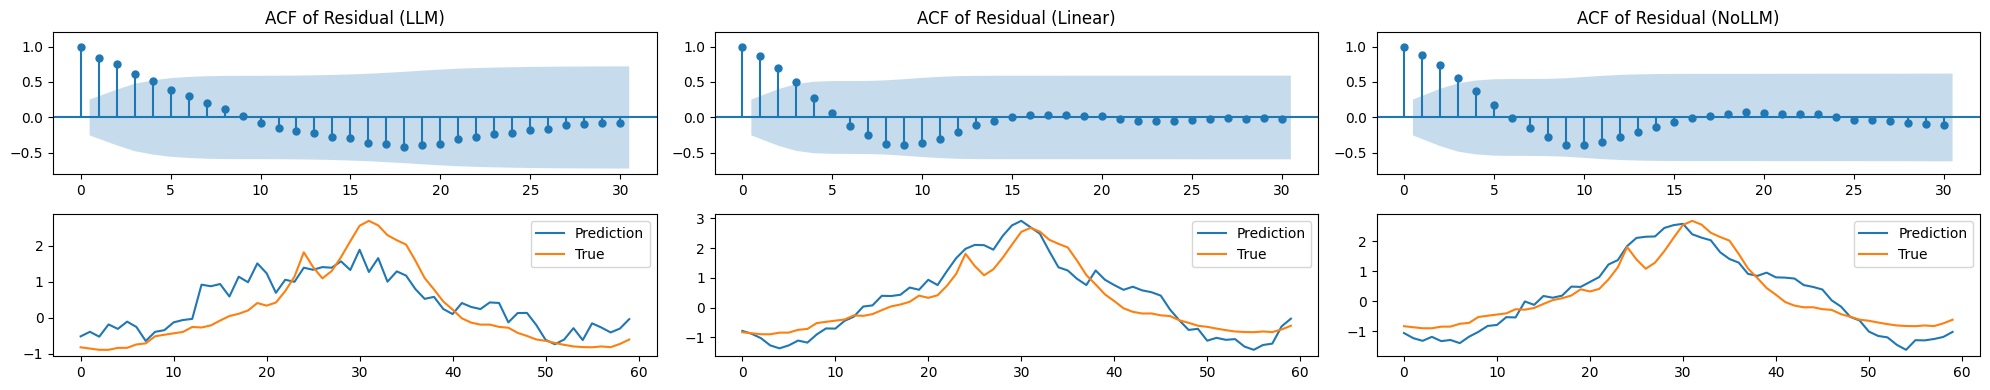

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def durbin_watson(residuals):
    residuals = residuals.flatten()
    diff_residuals = np.diff(residuals)
    numerator = np.sum(diff_residuals ** 2)
    denominator = np.sum(residuals ** 2)
    return numerator / denominator


idx = 50


gpt_pred_y = np.load('/home/nathan/LLM4TS/Anomaly_Detection_task/S2IP/results/long_term_forecast_illness___104_60_100_S2IPLLM_custom_ftM_sl104_ll0_pl60_dm768_nh6_el2_dl1_df768_fc1_ebtimeF_dtTrue_Exp_GPT2_0/pred.npy')
gpt_true_y = np.load('/home/nathan/LLM4TS/Anomaly_Detection_task/S2IP/results/long_term_forecast_illness___104_60_100_S2IPLLM_custom_ftM_sl104_ll0_pl60_dm768_nh6_el2_dl1_df768_fc1_ebtimeF_dtTrue_Exp_GPT2_0/true.npy')
gpt_res_y = gpt_true_y - gpt_pred_y
gpt_residuals = gpt_res_y[idx,:,0]


ln_pred_y = np.load('/home/nathan/LLM4TS/Anomaly_Detection_task/S2IP/results/long_term_forecast_illness___104_60_100_S2IPLLM_custom_ftM_sl104_ll0_pl60_dm768_nh6_el2_dl1_df768_fc1_ebtimeF_dtTrue_Exp_Linear_0/pred.npy')
ln_true_y = np.load('/home/nathan/LLM4TS/Anomaly_Detection_task/S2IP/results/long_term_forecast_illness___104_60_100_S2IPLLM_custom_ftM_sl104_ll0_pl60_dm768_nh6_el2_dl1_df768_fc1_ebtimeF_dtTrue_Exp_Linear_0/true.npy')
ln_res_y = ln_true_y - ln_pred_y
ln_residuals = ln_res_y[idx,:,0]


trans_pred_y = np.load('/home/nathan/LLM4TS/Anomaly_Detection_task/S2IP/results/long_term_forecast_illness___104_60_100_S2IPLLM_custom_ftM_sl104_ll0_pl60_dm768_nh6_el2_dl1_df768_fc1_ebtimeF_dtTrue_Exp_NoLLM_0/pred.npy')
trans_true_y = np.load('/home/nathan/LLM4TS/Anomaly_Detection_task/S2IP/results/long_term_forecast_illness___104_60_100_S2IPLLM_custom_ftM_sl104_ll0_pl60_dm768_nh6_el2_dl1_df768_fc1_ebtimeF_dtTrue_Exp_NoLLM_0/true.npy')
trans_res_y = trans_true_y - trans_pred_y
trans_residuals = trans_res_y[idx,:,0]


time = np.arange(len(trans_residuals))
fig, ax = plt.subplots(2, 3, figsize=(20, 4))




gpt_dw_stat = durbin_watson(gpt_residuals)
print(f'DW Statistics------> {gpt_dw_stat}')
# GPT residual Plot
plot_acf(gpt_residuals, lags=30, ax=ax[0,0], title="ACF of Residual (LLM)")
# plot_pacf(gpt_residuals, lags=30, ax=ax[1,0], title="PACF of Residual (LLM)")
ax[1, 0].plot(gpt_pred_y[idx, :, 0], label='Prediction')
ax[1, 0].plot(gpt_true_y[idx, :, 0], label='True')
ax[1, 0].legend()
ax[0, 0].set_ylim(-0.8, 1.2)
# ax[1, 0].set_ylim(-0.8, 1.2)



ln_dw_stat = durbin_watson(ln_residuals)
print(f'DW Statistics------> {ln_dw_stat}')
# Linear residual Plot
plot_acf(ln_residuals, lags=30, ax=ax[0, 1], title="ACF of Residual (Linear)")
# plot_pacf(ln_residuals, lags=30, ax=ax[1, 1], title="PACF of Residual (Linear)")
ax[1, 1].plot(ln_pred_y[idx, :, 0], label='Prediction')
ax[1, 1].plot(ln_true_y[idx, :, 0], label='True')
ax[1, 1].legend()
ax[0, 1].set_ylim(-0.8, 1.2)
# ax[1, 1].set_ylim(-0.8, 1.2)



trans_dw_stat = durbin_watson(trans_residuals)
print(f'DW Statistics------> {trans_dw_stat}')
# Trans Residual Plot
plot_acf(trans_residuals, lags=30, ax=ax[0, 2], title="ACF of Residual (NoLLM)")
# plot_pacf(trans_residuals, lags=30, ax=ax[1, 2], title="PACF of Residual (NoLLM)")
ax[1, 2].plot(trans_pred_y[idx, :, 0], label='Prediction')
ax[1, 2].plot(trans_true_y[idx, :, 0], label='True')
ax[1, 2].legend()
ax[0, 2].set_ylim(-0.8, 1.2)
# ax[1, 2].set_ylim(-0.8, 1.2)

plt.tight_layout()
plt.show()


# def durbin_watson(residuals):
#     residuals = residuals.flatten()
#     diff_residuals = np.diff(residuals)
#     numerator = np.sum(diff_residuals ** 2)
#     denominator = np.sum(residuals ** 2)
#     return numerator / denominator


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from einops import rearrange



def durbin_watson(residuals):
    residuals = residuals.flatten()
    diff_residuals = np.diff(residuals)
    numerator = np.sum(diff_residuals ** 2)
    denominator = np.sum(residuals ** 2)
    return numerator / denominator




gpt_pred_y = np.load('results/long_term_forecast_illness___104_60_100_S2IPLLM_custom_ftM_sl104_ll0_pl60_dm768_nh6_el2_dl1_df768_fc1_ebtimeF_dtTrue_Exp_GPT2_0/pred.npy')
gpt_true_y = np.load('results/long_term_forecast_illness___104_60_100_S2IPLLM_custom_ftM_sl104_ll0_pl60_dm768_nh6_el2_dl1_df768_fc1_ebtimeF_dtTrue_Exp_GPT2_0/true.npy')


# gpt_res_y = np.squeeze(gpt_true_y - gpt_pred_y)
gpt_res_y = gpt_true_y - gpt_pred_y
gpt_res_y = rearrange(gpt_res_y, ("a b c -> (a c) b"))


ln_pred_y = np.load('results/long_term_forecast_illness___104_60_100_S2IPLLM_custom_ftM_sl104_ll0_pl60_dm768_nh6_el2_dl1_df768_fc1_ebtimeF_dtTrue_Exp_Linear_0/pred.npy')
ln_true_y = np.load('results/long_term_forecast_illness___104_60_100_S2IPLLM_custom_ftM_sl104_ll0_pl60_dm768_nh6_el2_dl1_df768_fc1_ebtimeF_dtTrue_Exp_Linear_0/true.npy')

ln_res_y = ln_true_y - ln_pred_y
ln_res_y = rearrange(ln_res_y, ("a b c -> (a c) b"))

trans_pred_y = np.load('results/long_term_forecast_illness___104_60_100_S2IPLLM_custom_ftM_sl104_ll0_pl60_dm768_nh6_el2_dl1_df768_fc1_ebtimeF_dtTrue_Exp_NoLLM_0/pred.npy')
trans_true_y = np.load('results/long_term_forecast_illness___104_60_100_S2IPLLM_custom_ftM_sl104_ll0_pl60_dm768_nh6_el2_dl1_df768_fc1_ebtimeF_dtTrue_Exp_NoLLM_0/true.npy')

trans_res_y = trans_true_y - trans_pred_y
trans_res_y = rearrange(trans_res_y, ("a b c -> (a c) b"))

Dw_score = []
for i in gpt_res_y:
    Dw_score.append(durbin_watson(i))
print(np.mean(Dw_score))

Dw_score = []
for i in ln_res_y:
    Dw_score.append(durbin_watson(i))
print(np.mean(Dw_score))


Dw_score = []
for i in trans_res_y:
    Dw_score.append(durbin_watson(i))
print(np.mean(Dw_score))



(896, 60)
(896, 60)
0.24794044
0.15052935
0.14162663


DW Statistics------> 0.19956186413764954
DW Statistics------> 0.2963421642780304
DW Statistics------> 0.2925180494785309


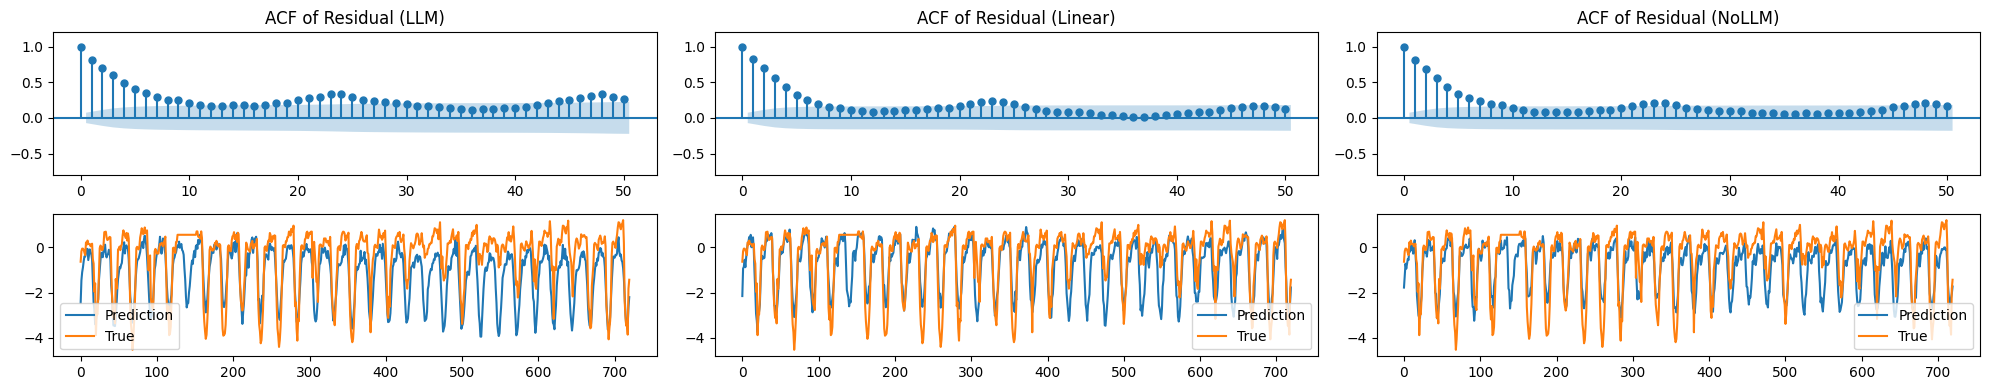

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def durbin_watson(residuals):
    residuals = residuals.flatten()
    diff_residuals = np.diff(residuals)
    numerator = np.sum(diff_residuals ** 2)
    denominator = np.sum(residuals ** 2)
    return numerator / denominator


idx = 40


gpt_pred_y = np.load('/home/nathan/LLM4TS/Anomaly_Detection_task/S2IP/results/long_term_forecast_ETTh1_512_720_S2IPLLM_ETTh1_ftM_sl512_ll0_pl720_dm768_nh6_el2_dl1_df768_fc1_ebtimeF_dtTrue_Exp_GPT2_0/pred.npy')
gpt_true_y = np.load('/home/nathan/LLM4TS/Anomaly_Detection_task/S2IP/results/long_term_forecast_ETTh1_512_720_S2IPLLM_ETTh1_ftM_sl512_ll0_pl720_dm768_nh6_el2_dl1_df768_fc1_ebtimeF_dtTrue_Exp_GPT2_0/true.npy')
gpt_res_y = gpt_true_y - gpt_pred_y
gpt_residuals = gpt_res_y[idx,:,0]


ln_pred_y = np.load('/home/nathan/LLM4TS/Anomaly_Detection_task/S2IP/results/long_term_forecast_ETTh1_512_720_S2IPLLM_ETTh1_ftM_sl512_ll0_pl720_dm768_nh6_el2_dl1_df768_fc1_ebtimeF_dtTrue_Exp_Linear_0/pred.npy')
ln_true_y = np.load('/home/nathan/LLM4TS/Anomaly_Detection_task/S2IP/results/long_term_forecast_ETTh1_512_720_S2IPLLM_ETTh1_ftM_sl512_ll0_pl720_dm768_nh6_el2_dl1_df768_fc1_ebtimeF_dtTrue_Exp_Linear_0/true.npy')
ln_res_y = ln_true_y - ln_pred_y
ln_residuals = ln_res_y[idx,:,0]


trans_pred_y = np.load('/home/nathan/LLM4TS/Anomaly_Detection_task/S2IP/results/long_term_forecast_ETTh1_512_720_S2IPLLM_ETTh1_ftM_sl512_ll0_pl720_dm768_nh6_el2_dl1_df768_fc1_ebtimeF_dtTrue_Exp_NoLLM_0/pred.npy')
trans_true_y = np.load('/home/nathan/LLM4TS/Anomaly_Detection_task/S2IP/results/long_term_forecast_ETTh1_512_720_S2IPLLM_ETTh1_ftM_sl512_ll0_pl720_dm768_nh6_el2_dl1_df768_fc1_ebtimeF_dtTrue_Exp_NoLLM_0/true.npy')
trans_res_y = trans_true_y - trans_pred_y
trans_residuals = trans_res_y[idx,:,0]


time = np.arange(len(trans_residuals))
fig, ax = plt.subplots(2, 3, figsize=(20, 4))




gpt_dw_stat = durbin_watson(gpt_residuals)
print(f'DW Statistics------> {gpt_dw_stat}')
# GPT residual Plot
plot_acf(gpt_residuals, lags=50, ax=ax[0,0], title="ACF of Residual (LLM)")
# plot_pacf(gpt_residuals, lags=50, ax=ax[1,0], title="PACF of Residual (LLM)")
ax[1, 0].plot(gpt_pred_y[idx, :, 0], label='Prediction')
ax[1, 0].plot(gpt_true_y[idx, :, 0], label='True')
ax[1, 0].legend()
ax[0, 0].set_ylim(-0.8, 1.2)
# ax[1, 0].set_ylim(-0.8, 1.2)



ln_dw_stat = durbin_watson(ln_residuals)
print(f'DW Statistics------> {ln_dw_stat}')
# Linear residual Plot
plot_acf(ln_residuals, lags=50, ax=ax[0, 1], title="ACF of Residual (Linear)")
# plot_pacf(ln_residuals, lags=50, ax=ax[1, 1], title="PACF of Residual (Linear)")
ax[1, 1].plot(ln_pred_y[idx, :, 0], label='Prediction')
ax[1, 1].plot(ln_true_y[idx, :, 0], label='True')
ax[1, 1].legend()
ax[0, 1].set_ylim(-0.8, 1.2)
# ax[1, 1].set_ylim(-0.8, 1.2)



trans_dw_stat = durbin_watson(trans_residuals)
print(f'DW Statistics------> {trans_dw_stat}')
# Trans Residual Plot
plot_acf(trans_residuals, lags=50, ax=ax[0, 2], title="ACF of Residual (NoLLM)")
# plot_pacf(trans_residuals, lags=50, ax=ax[1, 2], title="PACF of Residual (NoLLM)")
ax[1, 2].plot(trans_pred_y[idx, :, 0], label='Prediction')
ax[1, 2].plot(trans_true_y[idx, :, 0], label='True')
ax[1, 2].legend()
ax[0, 2].set_ylim(-0.8, 1.2)
# ax[1, 2].set_ylim(-0.8, 1.2)

plt.tight_layout()
plt.show()


# def durbin_watson(residuals):
#     residuals = residuals.flatten()
#     diff_residuals = np.diff(residuals)
#     numerator = np.sum(diff_residuals ** 2)
#     denominator = np.sum(residuals ** 2)
#     return numerator / denominator
